In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)

microplastics = pd.read_csv('data\Marine_Microplastics_WGS84_5159774935198085819.csv')
microplastics.head()

<>:3: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
C:\Users\charl\AppData\Local\Temp\ipykernel_30048\4206461962.py:3: SyntaxWarning: invalid escape sequence '\M'
  microplastics = pd.read_csv('data\Marine_Microplastics_WGS84_5159774935198085819.csv')


,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,Long Reference,DOI,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y
0,1,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,45.28,-60.29,7/13/1989 12:00:00 AM,88ccb360-a4b6-4dac-954e-4eb7d61ecab4,-60.29,45.28
1,2,Atlantic Ocean,NaN,NaN,Neuston net,0.002276,pieces/m3,0.0005-0.005,Low,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,40.93,-70.65,10/12/1989 12:00:00 AM,5a9c64f2-a6fb-40ed-a79a-f4bbb586d753,-70.65,40.93
2,3,Atlantic Ocean,NaN,NaN,Neuston net,0.004320,pieces/m3,0.0005-0.005,Low,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,40.93,-70.65,10/12/1989 12:00:00 AM,a09a6842-c66a-4718-9989-4907cd428f38,-70.65,40.93
3,4,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,40.30,-69.77,10/12/1989 12:00:00 AM,ce10e70e-5af9-4bb9-80ac-3467c3e90fba,-69.77,40.30
4,5,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,39.88,-67.15,10/15/1989 12:00:00 AM,c2ccdc44-5c00-4e4d-bdcb-ae435dcefefd,-67.15,39.88


In [3]:
# extracting the month and year from the date column

# converting the date field to a datetime object
microplastics['Date'] = pd.to_datetime(microplastics['Date'])

# extract year and month from the date
microplastics['year'] = microplastics['Date'].dt.year
microplastics['month'] = microplastics['Date'].dt.month

microplastics.head()

C:\Users\charl\AppData\Local\Temp\ipykernel_30048\2843272352.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  microplastics['Date'] = pd.to_datetime(microplastics['Date'])


,OBJECTID,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Short Reference,Long Reference,DOI,Organization,Keywords,Accession Number,Accession Link,Latitude,Longitude,Date,GlobalID,x,y,year,month
0,1,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,45.28,-60.29,1989-07-13,88ccb360-a4b6-4dac-954e-4eb7d61ecab4,-60.29,45.28,1989,7
1,2,Atlantic Ocean,NaN,NaN,Neuston net,0.002276,pieces/m3,0.0005-0.005,Low,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,40.93,-70.65,1989-10-12,5a9c64f2-a6fb-40ed-a79a-f4bbb586d753,-70.65,40.93,1989,10
2,3,Atlantic Ocean,NaN,NaN,Neuston net,0.004320,pieces/m3,0.0005-0.005,Low,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,40.93,-70.65,1989-10-12,a09a6842-c66a-4718-9989-4907cd428f38,-70.65,40.93,1989,10
3,4,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,40.30,-69.77,1989-10-12,ce10e70e-5af9-4bb9-80ac-3467c3e90fba,-69.77,40.30,1989,10
4,5,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Law et al.2010,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,39.88,-67.15,1989-10-15,c2ccdc44-5c00-4e4d-bdcb-ae435dcefefd,-67.15,39.88,1989,10


In [4]:
print(microplastics.columns)

Index(['OBJECTID', 'Oceans', 'Regions', 'SubRegions', 'Sampling Method',
       'Measurement', 'Unit', 'Density Range', 'Density Class',
       'Short Reference', 'Long Reference', 'DOI', 'Organization', 'Keywords',
       'Accession Number', 'Accession Link', 'Latitude', 'Longitude', 'Date',
       'GlobalID', 'x', 'y', 'year', 'month'],
      dtype='object')


In [5]:
data = microplastics[['Oceans', 'Regions', 'SubRegions', 'Sampling Method',
       'Measurement', 'Unit', 'Density Range', 'Density Class', 'Organization', 'Accession Link',
       'Latitude', 'Longitude', 'x', 'y', 'year', 'month']]

data.head()

,Oceans,Regions,SubRegions,Sampling Method,Measurement,Unit,Density Range,Density Class,Organization,Accession Link,Latitude,Longitude,x,y,year,month
0,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,45.28,-60.29,-60.29,45.28,1989,7
1,Atlantic Ocean,NaN,NaN,Neuston net,0.002276,pieces/m3,0.0005-0.005,Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,40.93,-70.65,-70.65,40.93,1989,10
2,Atlantic Ocean,NaN,NaN,Neuston net,0.004320,pieces/m3,0.0005-0.005,Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,40.93,-70.65,-70.65,40.93,1989,10
3,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,40.30,-69.77,-69.77,40.30,1989,10
4,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,39.88,-67.15,-67.15,39.88,1989,10


In [6]:
data.columns = data.columns.str.strip().str.lower()
data.head()

,oceans,regions,subregions,sampling method,measurement,unit,density range,density class,organization,accession link,latitude,longitude,x,y,year,month
0,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,45.28,-60.29,-60.29,45.28,1989,7
1,Atlantic Ocean,NaN,NaN,Neuston net,0.002276,pieces/m3,0.0005-0.005,Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,40.93,-70.65,-70.65,40.93,1989,10
2,Atlantic Ocean,NaN,NaN,Neuston net,0.004320,pieces/m3,0.0005-0.005,Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,40.93,-70.65,-70.65,40.93,1989,10
3,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,40.30,-69.77,-69.77,40.30,1989,10
4,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,39.88,-67.15,-67.15,39.88,1989,10


In [7]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# we have decided to not take care of any missing values, because they still have necessary data in other columns

oceans           271
regions        12076
subregions     20815
measurement     5817
dtype: int64


In [8]:
oceans_nan = data[data['oceans'].isna()]
oceans_nan

# when data on oceans is missing, region and subregional data is also nan - but there is long and lat data so can be plotted


,oceans,regions,subregions,sampling method,measurement,unit,density range,density class,organization,accession link,latitude,longitude,x,y,year,month
16353,NaN,NaN,NaN,Hand picking,NaN,pieces/10 mins,2-40,Medium,University of Texas Marine Science Institute,https://www.ncei.noaa.gov/access/metadata/land...,43.2157,-81.9591,-81.9591,43.2157,2019,5
16646,NaN,NaN,NaN,Hand picking,NaN,pieces/10 mins,2-40,Medium,University of Texas Marine Science Institute,https://www.ncei.noaa.gov/access/metadata/land...,40.8924,-90.6123,-90.6123,40.8924,2019,7
16648,NaN,NaN,NaN,Hand picking,NaN,pieces/10 mins,2-40,Medium,University of Texas Marine Science Institute,https://www.ncei.noaa.gov/access/metadata/land...,40.8925,-90.6123,-90.6123,40.8925,2019,7
16663,NaN,NaN,NaN,Hand picking,NaN,pieces/10 mins,2-40,Medium,University of Texas Marine Science Institute,https://www.ncei.noaa.gov/access/metadata/land...,40.9349,-90.9574,-90.9574,40.9349,2019,7
16665,NaN,NaN,NaN,Hand picking,NaN,pieces/10 mins,1-2,Low,University of Texas Marine Science Institute,https://www.ncei.noaa.gov/access/metadata/land...,43.3468,-70.4736,-70.4736,43.3468,2019,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21361,NaN,NaN,NaN,Hand picking,NaN,pieces/10 mins,1-2,Low,University of Texas Marine Science Institute,https://www.ncei.noaa.gov/access/metadata/land...,41.3836,-82.5145,-82.5145,41.3836,2022,5
21373,NaN,NaN,NaN,Hand picking,NaN,pieces/10 mins,0,Very Low,University of Texas Marine Science Institute,https://www.ncei.noaa.gov/access/metadata/land...,29.9723,-99.2233,-99.2233,29.9723,2022,5
21382,NaN,NaN,NaN,Hand picking,NaN,pieces/10 mins,>200,Very High,University of Texas Marine Science Institute,https://www.ncei.noaa.gov/access/metadata/land...,43.0528,-78.8967,-78.8967,43.0528,2022,5
21383,NaN,NaN,NaN,Hand picking,NaN,pieces/10 mins,40-200,High,University of Texas Marine Science Institute,https://www.ncei.noaa.gov/access/metadata/land...,43.0528,-78.8967,-78.8967,43.0528,2022,5


In [9]:
measurement_nan = data[data['measurement'].isna()]
(measurement_nan['sampling method']).value_counts()

# all the nan measurement values are attributed to hand picking as the sampling method

sampling method
Hand picking    5817
Name: count, dtype: int64

In [10]:
data.describe()

,measurement,latitude,longitude,x,y,year,month
count,16449.000000,22266.000000,22266.000000,22266.000000,22266.000000,22266.000000,22266.000000
mean,392.823279,26.333569,-67.218853,-67.218853,26.333569,2010.852915,6.890461
std,8295.005977,18.137928,67.462034,67.462034,18.137928,9.897606,3.474806
min,0.000000,-71.699040,-179.994200,-179.994200,-71.699040,1972.000000,1.000000
25%,0.000000,20.150000,-97.167350,-97.167350,20.150000,2003.000000,4.000000
50%,0.010800,28.083575,-79.500000,-79.500000,28.083575,2014.000000,7.000000
75%,0.202381,33.730000,-60.000000,-60.000000,33.730000,2019.000000,10.000000
max,800000.000000,89.761400,179.854333,179.854333,89.761400,2022.000000,12.000000


In [11]:
len(data)

22266

In [12]:
data.dtypes

oceans              object
regions             object
subregions          object
sampling method     object
measurement        float64
unit                object
density range       object
density class       object
organization        object
accession link      object
latitude           float64
longitude          float64
x                  float64
y                  float64
year                 int32
month                int32
dtype: object

In [13]:
(data['oceans']).value_counts()

oceans
Atlantic Ocean    15271
Pacific Ocean      5744
Indian Ocean        643
Arctic Ocean        310
Southern Ocean       27
Name: count, dtype: int64

In [14]:
(data['regions']).value_counts()

regions
Gulf of Mexico                               4817
Caribbean Sea                                1886
Mediterranean Sea                            1060
North Sea                                     253
Inner Seas off the West Coast of Scotland     225
                                             ... 
Celebes Sea                                     1
Bay of Fundy                                    1
Gulf of Guinea                                  1
Persian Gulf                                    1
Tokyo Bay                                       1
Name: count, Length: 80, dtype: int64

In [15]:
(data['subregions']).value_counts()

subregions
Western Basin                             356
Tampa Bay                                 224
Eastern Basin                             169
Gulf of Mannar                            144
Balearic Sea                              144
Tyrrhenian Sea                            140
Ionian Sea                                 62
Aegean Sea                                 59
Adriatic Sea                               55
Ligurian Sea                               49
Alboran Sea                                23
Coastal Waters of Florida                  12
Florida Keys National Marine Sanctuary      7
Strait of Gibraltar                         3
Gulf of Riga                                2
Gulf of Suez                                1
Gulf of Bothnia                             1
Name: count, dtype: int64

In [16]:
(data['sampling method']).value_counts()

sampling method
Neuston net                  10390
Hand picking                  5835
Manta net                     2731
Grab sample                   1389
PVC cylinder                   370
Intake seawater pump           284
Van Dorn sampler               181
Metal spoon                    135
Plankton net                   100
Megacorer                       90
Metal scoop                     89
plankton net                    72
shovel                          72
Stainless steel bucket          69
Trowel                          60
Aluminum bucket                 57
Stainless steel spoon           50
CTD rosette sampler             48
Ekman dredge                    45
Remotely operated vehicle       40
AVANI net                       36
Petite Ponar benthic grab       36
Sediment grab sampler           26
stainless-steel sampler         23
Day grab                        17
Shipek grab sampler              9
Van Veen grab sampler            7
Surface water intake             5
Name

In [17]:
(data['unit']).value_counts()

unit
pieces/m3           16031
pieces/10 mins       5817
pieces kg-1 d.w.      418
Name: count, dtype: int64

In [18]:
# creating a separate dataframe that drops nan values for the measurement column for use in visualisation

measurements = data.dropna(subset=['measurement'])
measurements.head()

,oceans,regions,subregions,sampling method,measurement,unit,density range,density class,organization,accession link,latitude,longitude,x,y,year,month
0,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,45.28,-60.29,-60.29,45.28,1989,7
1,Atlantic Ocean,NaN,NaN,Neuston net,0.002276,pieces/m3,0.0005-0.005,Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,40.93,-70.65,-70.65,40.93,1989,10
2,Atlantic Ocean,NaN,NaN,Neuston net,0.004320,pieces/m3,0.0005-0.005,Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,40.93,-70.65,-70.65,40.93,1989,10
3,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,40.30,-69.77,-69.77,40.30,1989,10
4,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,39.88,-67.15,-67.15,39.88,1989,10


In [19]:
len(measurements)

16449

In [20]:
neuston_net = data[data['sampling method'] == 'Neuston net']
neuston_net.head()

,oceans,regions,subregions,sampling method,measurement,unit,density range,density class,organization,accession link,latitude,longitude,x,y,year,month
0,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,45.28,-60.29,-60.29,45.28,1989,7
1,Atlantic Ocean,NaN,NaN,Neuston net,0.002276,pieces/m3,0.0005-0.005,Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,40.93,-70.65,-70.65,40.93,1989,10
2,Atlantic Ocean,NaN,NaN,Neuston net,0.004320,pieces/m3,0.0005-0.005,Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,40.93,-70.65,-70.65,40.93,1989,10
3,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,40.30,-69.77,-69.77,40.30,1989,10
4,Atlantic Ocean,NaN,NaN,Neuston net,0.000000,pieces/m3,0-0.0005,Very Low,Sea Education Association,https://www.ncei.noaa.gov/access/metadata/land...,39.88,-67.15,-67.15,39.88,1989,10


In [21]:
len(neuston_net)

10390

In [22]:
hand_picking = data[data['sampling method'] == 'Hand picking']
hand_picking.head()

,oceans,regions,subregions,sampling method,measurement,unit,density range,density class,organization,accession link,latitude,longitude,x,y,year,month
15598,Atlantic Ocean,Gulf of Mexico,NaN,Hand picking,NaN,pieces/10 mins,2-40,Medium,University of Texas Marine Science Institute,https://www.ncei.noaa.gov/access/metadata/land...,27.2049,-97.3645,-97.3645,27.2049,2018,11
15599,Atlantic Ocean,Gulf of Mexico,NaN,Hand picking,NaN,pieces/10 mins,40-200,High,University of Texas Marine Science Institute,https://www.ncei.noaa.gov/access/metadata/land...,27.4147,-97.3016,-97.3016,27.4147,2018,11
15600,Atlantic Ocean,Gulf of Mexico,NaN,Hand picking,NaN,pieces/10 mins,40-200,High,University of Texas Marine Science Institute,https://www.ncei.noaa.gov/access/metadata/land...,27.6057,-97.2077,-97.2077,27.6057,2018,11
15601,Atlantic Ocean,Gulf of Mexico,NaN,Hand picking,NaN,pieces/10 mins,2-40,Medium,University of Texas Marine Science Institute,https://www.ncei.noaa.gov/access/metadata/land...,26.0983,-97.1623,-97.1623,26.0983,2018,11
15602,Atlantic Ocean,Gulf of Mexico,NaN,Hand picking,NaN,pieces/10 mins,1-2,Low,University of Texas Marine Science Institute,https://www.ncei.noaa.gov/access/metadata/land...,27.8322,-97.3784,-97.3784,27.8322,2018,11


In [23]:
len(hand_picking)

5835

In [24]:
manta_net = data[data['sampling method'] == 'Manta net']
manta_net.head()

,oceans,regions,subregions,sampling method,measurement,unit,density range,density class,organization,accession link,latitude,longitude,x,y,year,month
10186,Pacific Ocean,Tasman Sea,NaN,Manta net,0.008330,pieces/m3,0.005-1,Medium,University of Western Australia,https://www.ncei.noaa.gov/access/metadata/land...,-41.89778,148.44818,148.44818,-41.89778,2012,4
10187,Pacific Ocean,Tasman Sea,NaN,Manta net,0.032146,pieces/m3,0.005-1,Medium,University of Western Australia,https://www.ncei.noaa.gov/access/metadata/land...,-41.88393,148.48472,148.48472,-41.88393,2012,4
10188,Pacific Ocean,Tasman Sea,NaN,Manta net,0.027710,pieces/m3,0.005-1,Medium,University of Western Australia,https://www.ncei.noaa.gov/access/metadata/land...,-41.87590,148.50267,148.50267,-41.87590,2012,4
10189,Pacific Ocean,Tasman Sea,NaN,Manta net,0.000000,pieces/m3,0-0.0005,Very Low,University of Western Australia,https://www.ncei.noaa.gov/access/metadata/land...,-39.65648,148.89263,148.89263,-39.65648,2012,4
10190,Pacific Ocean,Tasman Sea,NaN,Manta net,0.000000,pieces/m3,0-0.0005,Very Low,University of Western Australia,https://www.ncei.noaa.gov/access/metadata/land...,-39.65205,148.87323,148.87323,-39.65205,2012,4


In [25]:
len(manta_net)

2731

In [26]:
grab_sample = data[data['sampling method'] == 'Grab sample']
grab_sample.head()

,oceans,regions,subregions,sampling method,measurement,unit,density range,density class,organization,accession link,latitude,longitude,x,y,year,month
8665,Pacific Ocean,Gulf of Alaska,NaN,Grab sample,0.001,pieces/m3,0.0005-0.005,Low,Adventure Scientist,https://www.ncei.noaa.gov/access/metadata/land...,59.3787,-153.5209,-153.5209,59.3787,2013,7
8666,Pacific Ocean,Gulf of Alaska,NaN,Grab sample,0.001,pieces/m3,0.0005-0.005,Low,Adventure Scientist,https://www.ncei.noaa.gov/access/metadata/land...,59.3681,-153.5523,-153.5523,59.3681,2013,7
8667,Pacific Ocean,Gulf of Alaska,NaN,Grab sample,0.014,pieces/m3,0.005-1,Medium,Adventure Scientist,https://www.ncei.noaa.gov/access/metadata/land...,59.3415,-153.5498,-153.5498,59.3415,2013,7
8668,Pacific Ocean,Gulf of Alaska,NaN,Grab sample,0.017,pieces/m3,0.005-1,Medium,Adventure Scientist,https://www.ncei.noaa.gov/access/metadata/land...,59.6387,-153.3957,-153.3957,59.6387,2013,7
8669,Pacific Ocean,Gulf of Alaska,NaN,Grab sample,0.071,pieces/m3,0.005-1,Medium,Adventure Scientist,https://www.ncei.noaa.gov/access/metadata/land...,59.3736,-153.4481,-153.4481,59.3736,2013,7


In [27]:
len(grab_sample)

1389

In [28]:
sns.set_theme(style="whitegrid")

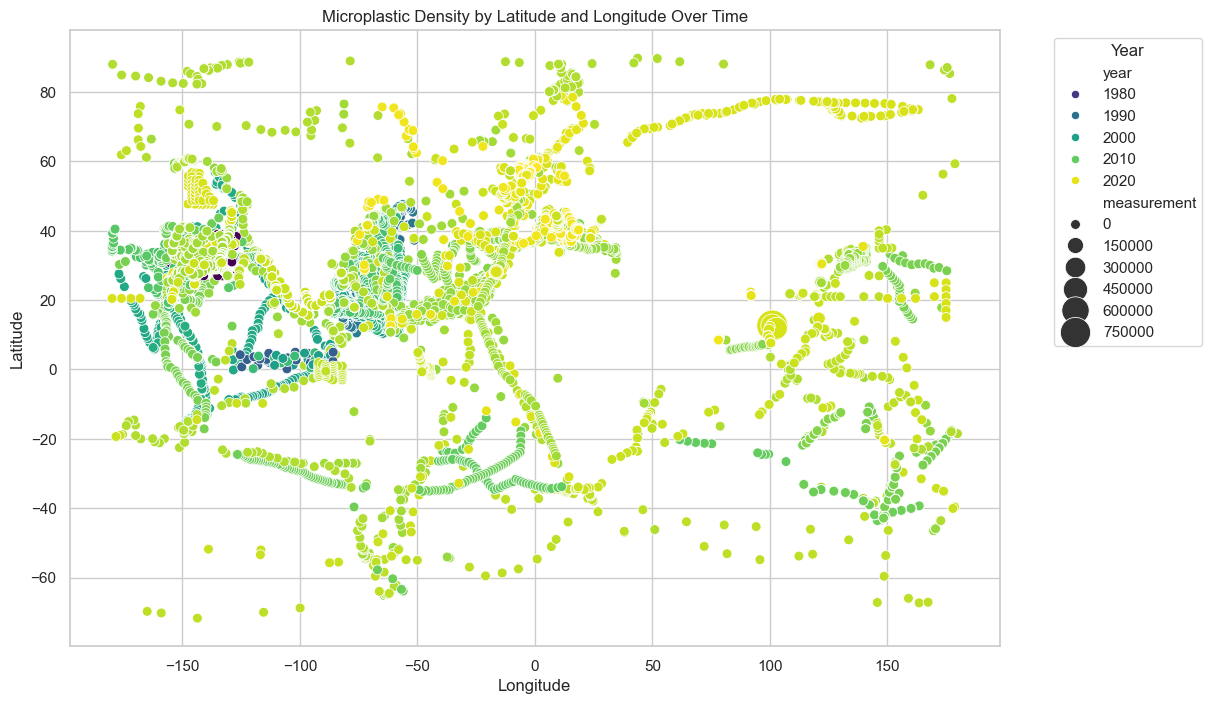

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='year', size='measurement', palette='viridis', sizes=(50, 500))
plt.title('Microplastic Density by Latitude and Longitude Over Time')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

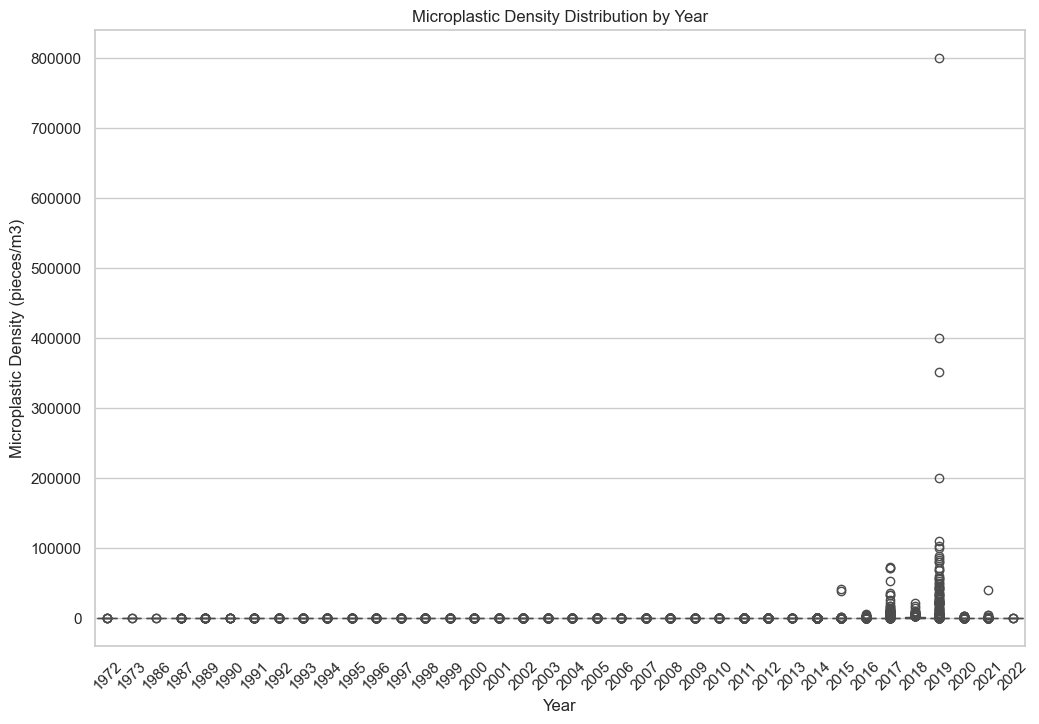

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = measurements, x='year', y='measurement')
plt.title('Microplastic Density Distribution by Year')
plt.ylabel('Microplastic Density (pieces/m3)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()


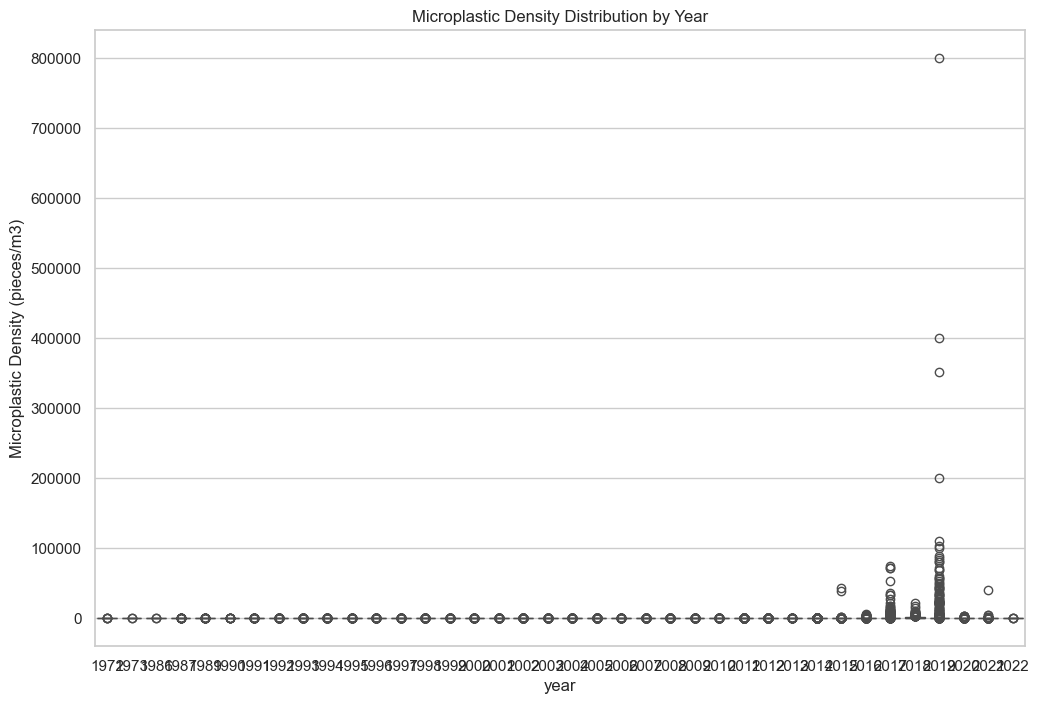

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=measurements, x='year', y='measurement')
plt.title('Microplastic Density Distribution by Year')
plt.ylabel('Microplastic Density (pieces/m3)')
plt.show()

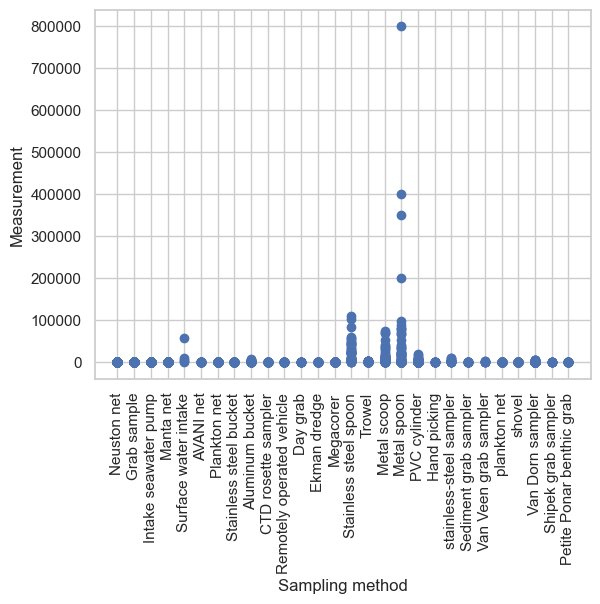

In [ ]:
plt.scatter('sampling method', 'measurement', data = data)
plt.xlabel('Sampling method')
plt.ylabel('Measurement')
plt.xticks(rotation = 90)
plt.show()

In [32]:
measurements['measurement'].sort_values(ascending =False)

15174    800000.0
15175    400000.0
15202    352000.0
15201    200000.0
15016    110480.0
           ...   
57            0.0
56            0.0
53            0.0
9457          0.0
39            0.0
Name: measurement, Length: 16449, dtype: float64

In [33]:
measurements.loc[15174]

oceans                                                 Pacific Ocean
regions                                             Gulf of Thailand
subregions                                                       NaN
sampling method                                          Metal spoon
measurement                                                 800000.0
unit                                                       pieces/m3
density range                                                 >40000
density class                                              Very High
organization             Chulalongkorn University, Bangkok, Thailand
accession link     https://www.ncei.noaa.gov/access/metadata/land...
latitude                                                   12.663611
longitude                                                 101.038333
x                                                         101.038333
y                                                          12.663611
year                              

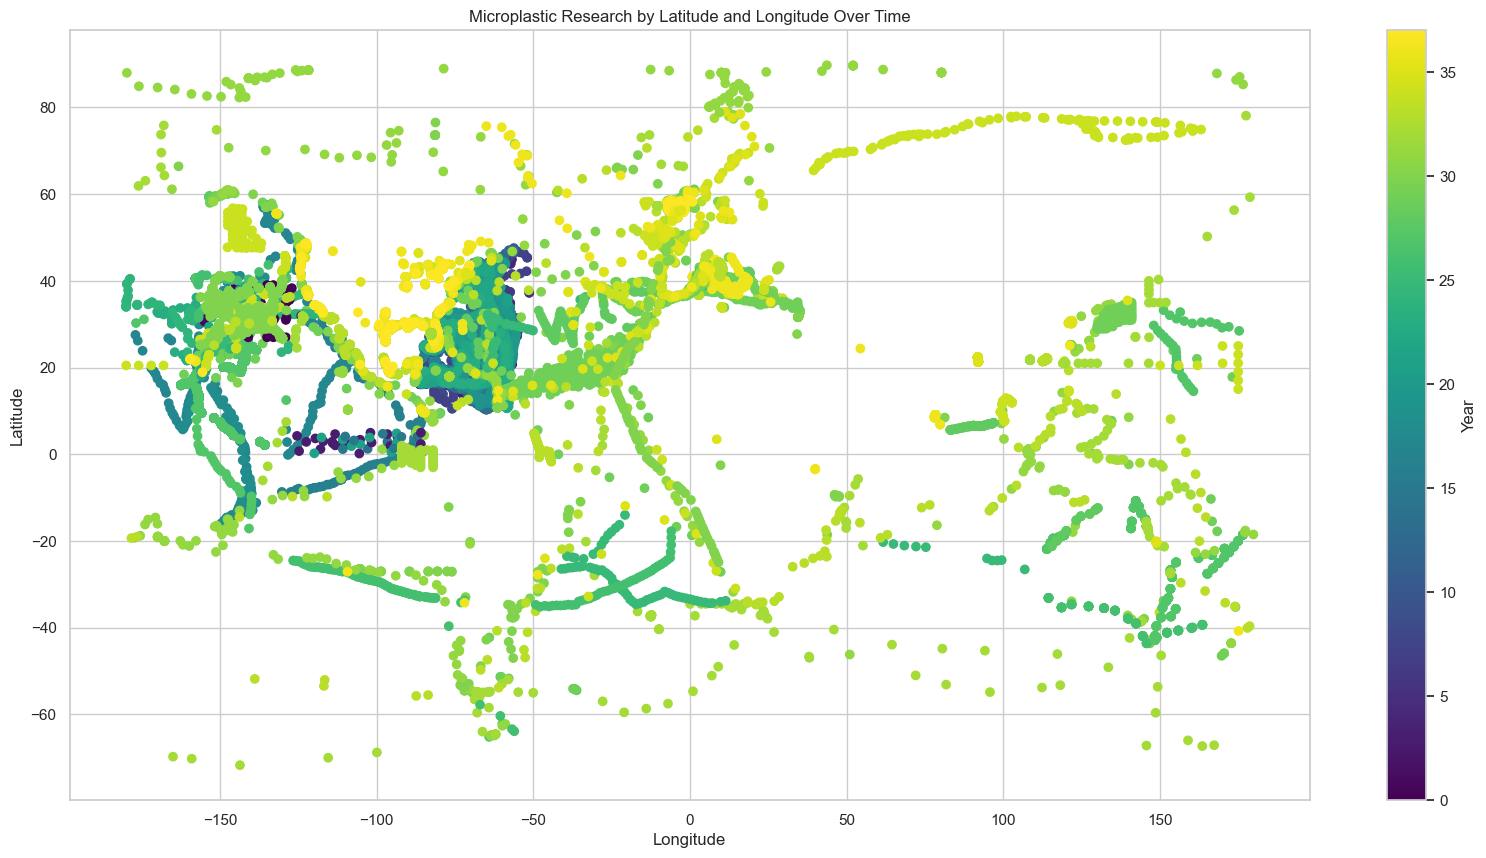

In [34]:
plt.figure(figsize=(20, 10))
scatter = plt.scatter(
    x=data['longitude'],
    y=data['latitude'],
    c=pd.Categorical(data['year']).codes,
    cmap='viridis'
)
plt.colorbar(scatter, label='Year')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Microplastic Research by Latitude and Longitude Over Time')
plt.show()

C:\Users\charl\AppData\Local\Temp\ipykernel_30048\1480203036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_code'] = categories.codes  # Extract numeric codes for coloring


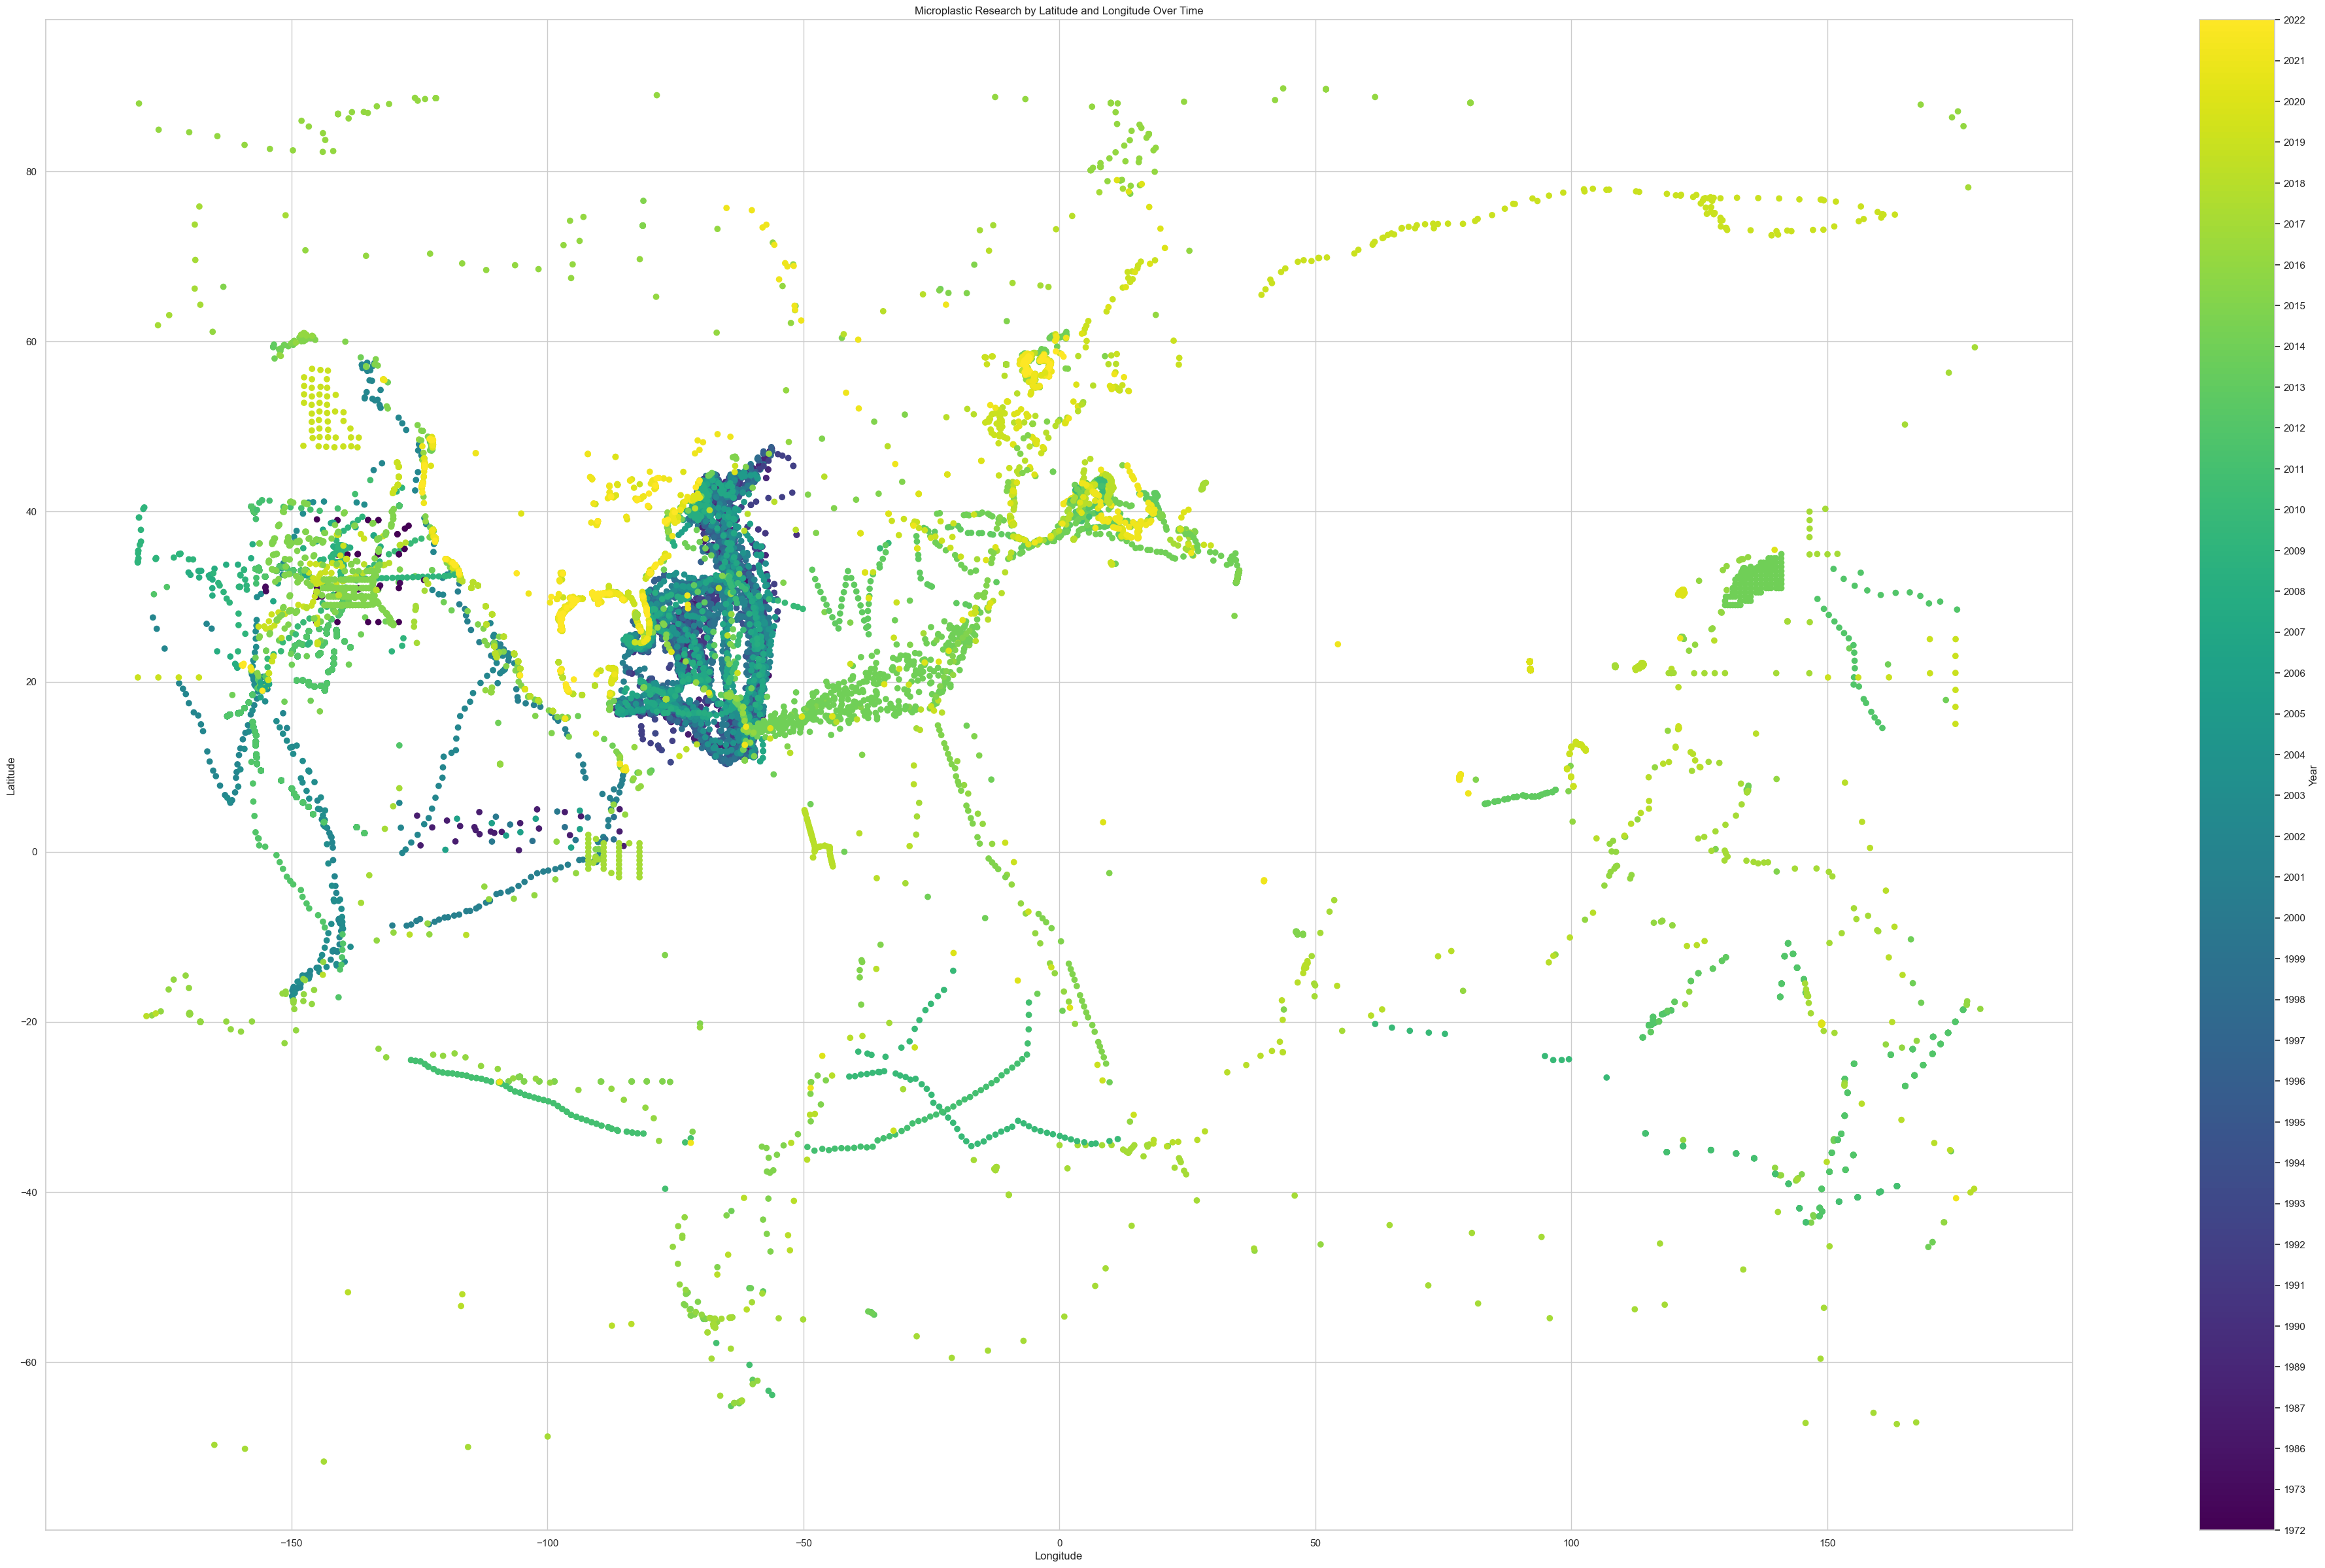

In [35]:
# Create categories and extract numeric codes
categories = pd.Categorical(data['year'])
data['year_code'] = categories.codes  # Extract numeric codes for coloring
year_mapping = dict(enumerate(categories.categories))  # Map codes to actual years

# Create the scatter plot
plt.figure(figsize=(50, 30))
scatter = plt.scatter(
    x=data['longitude'],
    y=data['latitude'],
    c=data['year_code'],  # Use the numeric codes for coloring
    cmap='viridis'
)

# Add a color bar and customize its ticks
cbar = plt.colorbar(scatter, label='Year')
cbar.set_ticks(list(year_mapping.keys()))  # Set tick positions at numeric code values
cbar.set_ticklabels(list(year_mapping.values()))  # Replace tick labels with actual years

# Final plot adjustments
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Microplastic Research by Latitude and Longitude Over Time')
plt.show()

C:\Users\charl\AppData\Local\Temp\ipykernel_30048\3482190204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sampling_method_code'] = categories.codes  # Extract numeric codes for coloring


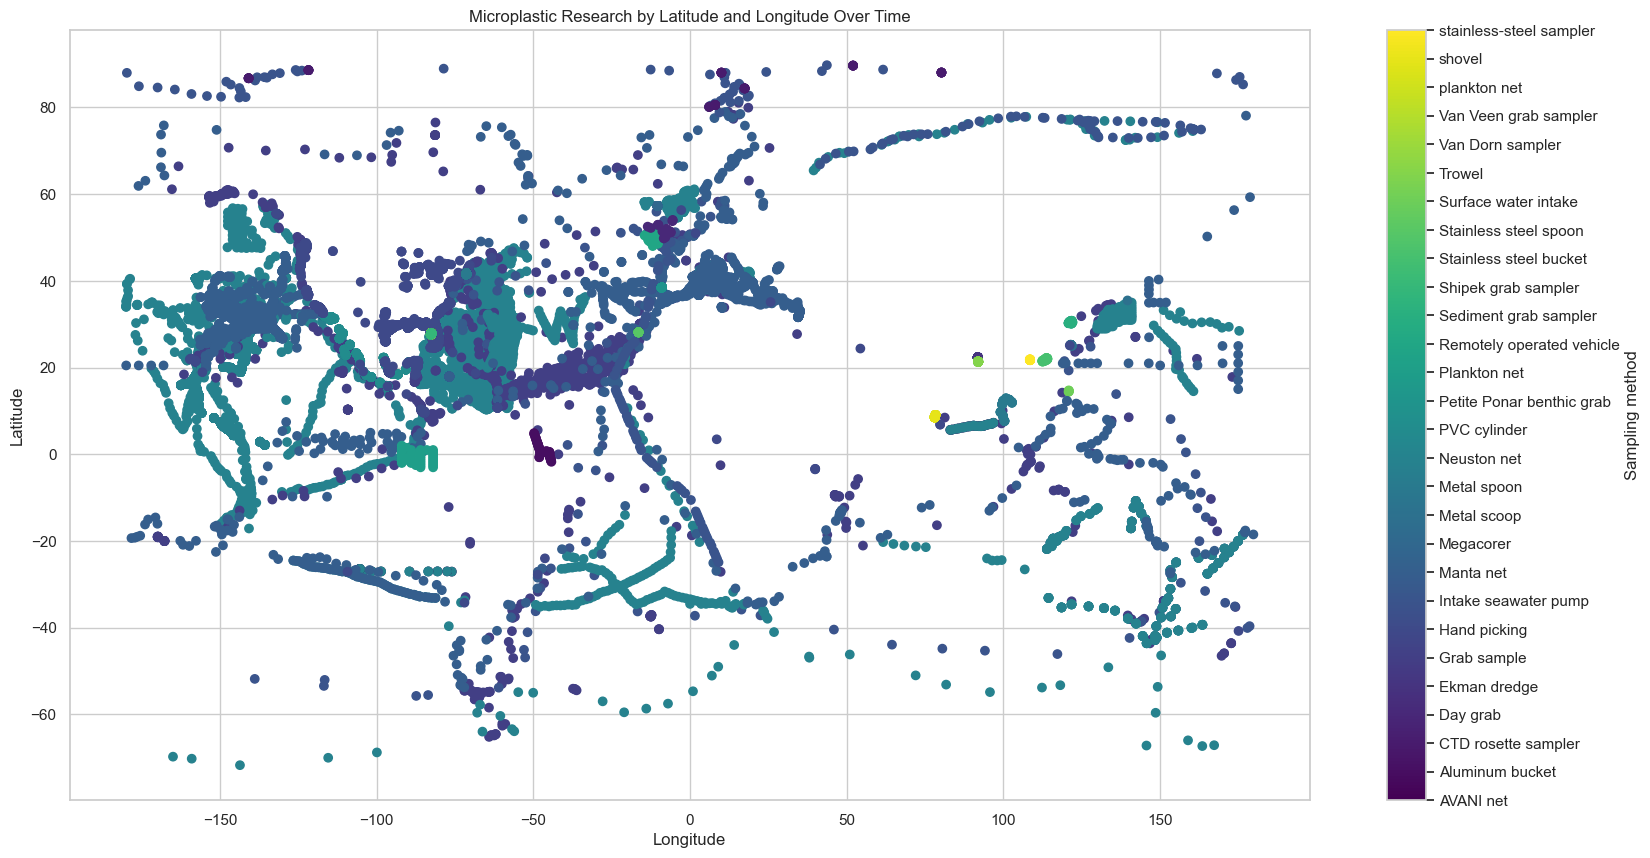

In [36]:
# Create categories and extract numeric codes
categories = pd.Categorical(data['sampling method'])
data['sampling_method_code'] = categories.codes  # Extract numeric codes for coloring
sampling_method_mapping = dict(enumerate(categories.categories))  # Map codes to actual years

# Create the scatter plot
plt.figure(figsize=(20, 10))
scatter = plt.scatter(
    x=data['longitude'],
    y=data['latitude'],
    c=data['sampling_method_code'],  # Use the numeric codes for coloring
    cmap='viridis'
)

# Add a color bar and customize its ticks
cbar = plt.colorbar(scatter, label='Sampling method')
cbar.set_ticks(list(sampling_method_mapping.keys()))  # Set tick positions at numeric code values
cbar.set_ticklabels(list(sampling_method_mapping.values()))  # Replace tick labels with actual years

# Final plot adjustments
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Microplastic Research by Latitude and Longitude Over Time')
plt.show()

In [37]:
above_100_samples = (data['sampling method']).value_counts() >= 100
above_100_samples.value_counts()

count
False    19
True      9
Name: count, dtype: int64

In [38]:

sampling_counts = data['sampling method'].value_counts()
above_100 = sampling_counts[sampling_counts >= 100].index
above_100_samples = data[data['sampling method'].isin(sampling_methods_above_100)]

above_100_samples['sampling method'].value_counts()


NameError: name 'sampling_methods_above_100' is not defined

In [80]:
len(above_100_samples)

21415

In [65]:
data.dtypes

oceans              object
regions             object
subregions          object
sampling method     object
measurement        float64
unit                object
density range       object
density class       object
organization        object
accession link      object
latitude           float64
longitude          float64
x                  float64
y                  float64
year                 int32
month                int32
year_code             int8
dtype: object

C:\Users\charl\AppData\Local\Temp\ipykernel_21652\3410696596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  above_100_samples['sampling_method_code'] = categories.codes  # Extract numeric codes for coloring


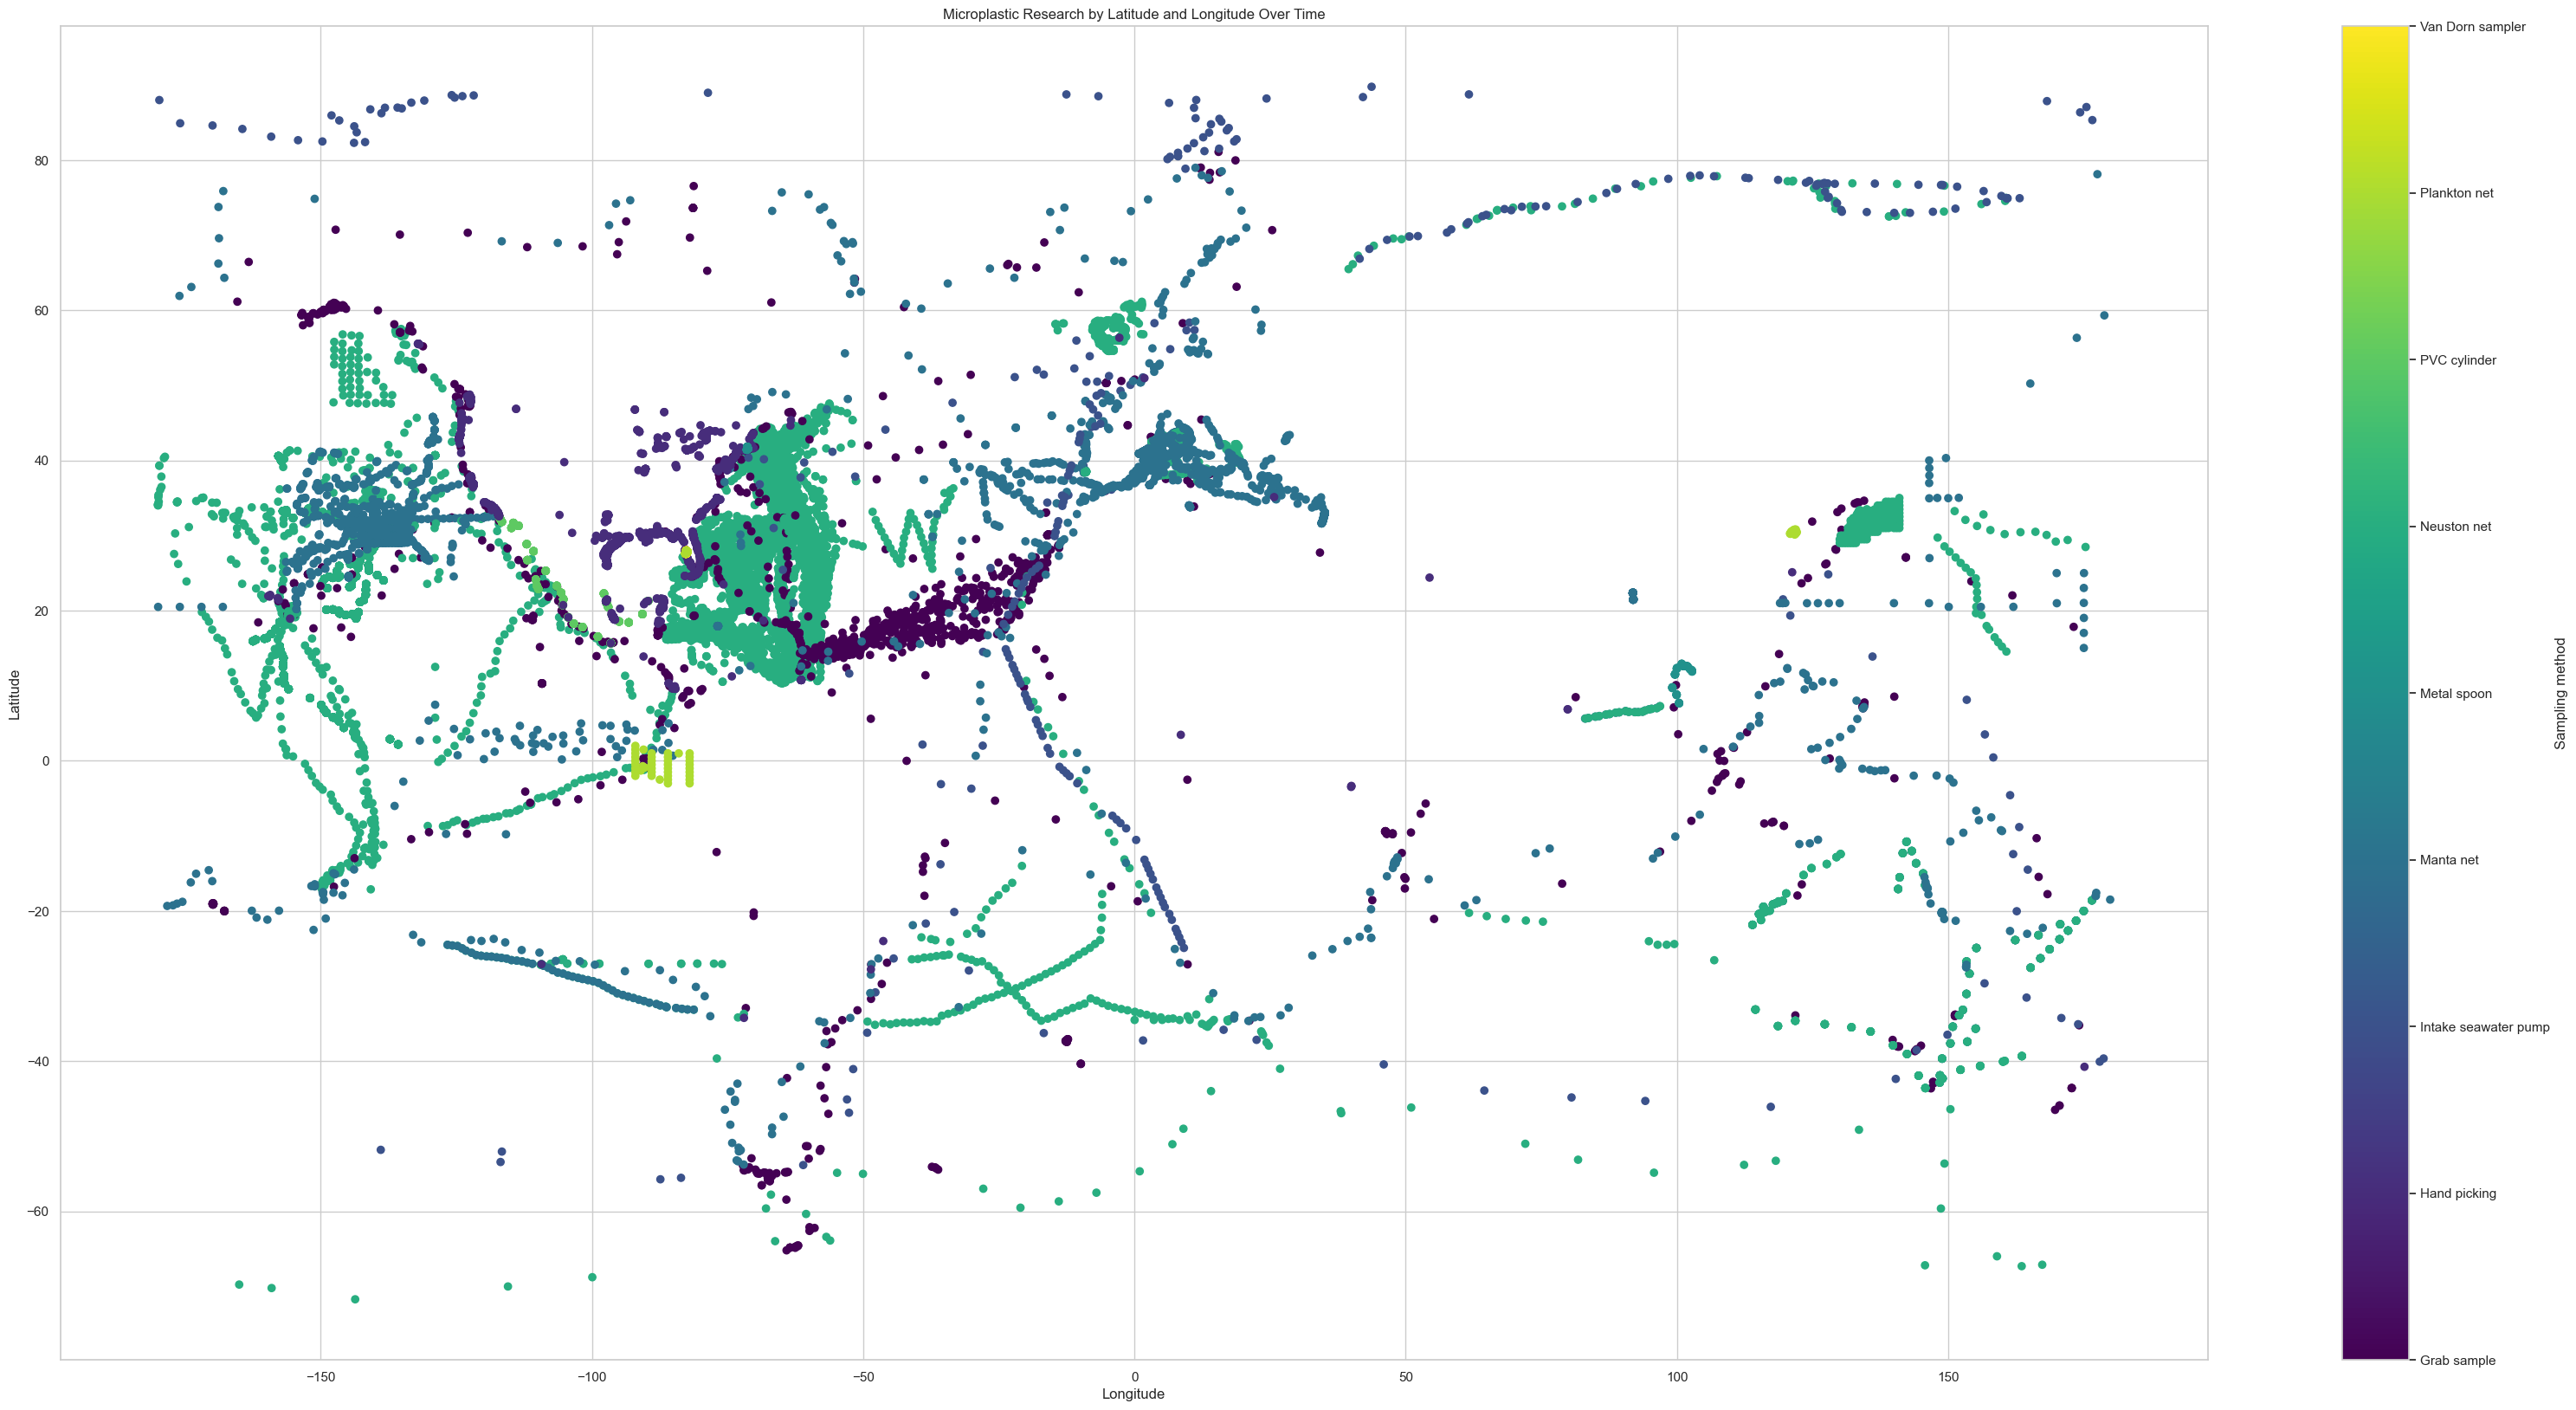

In [ ]:
# Create categories and extract numeric codes
categories = pd.Categorical(above_100_samples['sampling method'])
above_100_samples['sampling_method_code'] = categories.codes  # Extract numeric codes for coloring
sampling_method_mapping = dict(enumerate(categories.categories))  # Map codes to actual years

# Create the scatter plot
plt.figure(figsize=(40, 20))
scatter = plt.scatter(
    x=above_100_samples['longitude'],
    y=above_100_samples['latitude'],
    c=above_100_samples['sampling_method_code'],  # Use the numeric codes for coloring
    cmap='viridis'
)

# Add a color bar and customize its ticks
cbar = plt.colorbar(scatter, label='Sampling method')
cbar.set_ticks(list(sampling_method_mapping.keys()))  # Set tick positions at numeric code values
cbar.set_ticklabels(list(sampling_method_mapping.values()))  # Replace tick labels with actual years

# Final plot adjustments
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Microplastic Research by Latitude and Longitude Over Time')

#f = 1.0/np.cos(60*np.pi/180)
#plt.gca().set_aspect(f)

plt.show()

In [ ]:
# descriptive stats for the sampling methods

grouped_stats = data.groupby('sampling method')['measurement'].describe()
grouped_stats

,count,mean,std,min,25%,50%,75%,max
sampling method,,,,,,,,
AVANI net,36.0,0.117038,0.279832,0.005113,0.019015,0.062537,0.111311,1.713479
Aluminum bucket,57.0,2089.859649,1341.990835,703.000000,1083.000000,1710.000000,2635.333333,7650.333333
CTD rosette sampler,48.0,46.500000,62.137117,0.000000,21.000000,21.000000,63.000000,375.000000
Day grab,17.0,30.658824,18.790791,2.400000,15.200000,30.600000,40.000000,77.000000
Ekman dredge,45.0,115.000000,60.687351,10.000000,70.000000,120.000000,165.000000,255.000000
Grab sample,1389.0,0.012778,0.027354,0.000000,0.001000,0.005000,0.012000,0.323000
Hand picking,18.0,0.580247,0.722655,0.000000,0.000000,0.388889,0.861111,2.888889
Intake seawater pump,284.0,13.976388,34.935007,0.000000,0.500000,1.000000,11.000000,349.000000
Manta net,2731.0,1.901485,7.432924,0.000000,0.082548,0.440247,1.603295,324.000000
